# Project 1
---

**Class:** I320D - Data Science for Biomedical Informatics (Sp26)  
**Instructor:** Ammar Darkazanli  
  
  
**Project:**  Pima Indians Diabetes Dataset Analysis  
**Assignment Ver.:** D  

**Dataset:** Pima Indians Diabetes Database  
**Source:** Originally from the National Institute of Diabetes and Digestive and Kidney Diseases  
**Link to Source:** https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database  
**File:** `diabetes.csv`  
**Target Variable:** `Outcome` (whether the patient has diabetes: 1 = Yes, 0 = No)




---





By completing this assignment, you will be able to:

1. ✅ Apply the systematic 10-Point Inspection to a new healthcare dataset
2. ✅ Identify and classify feature types (continuous, discrete, categorical, ordinal)
3. ✅ Detect and document data quality issues (missing values, zero-encoded values)
4. ✅ Research and document clinical meaning for healthcare variables
5. ✅ Create meaningful data groupings based on clinical standards
6. ✅ Formulate answerable research questions about diabetes risk factors

---

### Clinical Context

Diabetes affects over 37 million Americans and is the 8th leading cause of death in the United States. Type 2 diabetes, which accounts for 90-95% of all diabetes cases, can often be prevented or delayed with lifestyle changes when risk factors are identified early.

This dataset contains diagnostic measurements from female patients of Pima Indian heritage, all at least 21 years old. The Pima Indians have one of the highest rates of diabetes in the world, making this population particularly important for understanding diabetes risk factors. Understanding these variables is crucial for:

- Early identification of high-risk patients
- Preventive care planning
- Resource allocation in healthcare settings
- Clinical decision support systems

---



# Getting Started
---
### What are we Doing Here?
Pip Installs (if Required)  
Importing of Libraries  
Loading Dataset  
Stress Check -> Check if Dataset is Loaded


In [1]:
!pip install pandas --quiet
!pip install numpy --quiet
!pip install matplotlib --quiet
!pip install seaborn --quiet
!pip install scipy --quiet

print('No Errors Found!')

No Errors Found!


In [2]:
# In case it gives you a bunch of 'a new release of pip is available'

!pip install --upgrade pip --quiet

In [3]:
# Setting abrvs. & importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Config. of plots
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
sns.set_palette('husl')

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print(f"Pandas ver: {pd.__version__} | Numpy ver: {np.__version__} ")

Pandas ver: 2.3.3 | Numpy ver: 2.0.2 


In [4]:
# Loading Dataset & Displaying Rows to Check Successful Load

# -- Load the dataset
path = "diabetes.csv"
with open(path, 'rb') as csvfile: 
    df = pd.read_csv(csvfile)

# -- General overview of data
print("\nOverview\n")
print("="*60 + "\n")
print(f"# of records: {len(df):,}")
print(f"# of features: {len(df.columns)}")
print(f"memory used: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n"+"="*30)


Overview


# of records: 768
# of features: 9
memory used: 0.05 MB



In [5]:
#-- See first 5 records
print("\n" f"first 5 records:")
df.head()


first 5 records:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---

# Part 1: The 10-Point Data Inspection
 **Point Worth Total:** 40 points


---


### What are We Doing Here?
Going through the 10point data inspection.  
  


**Steps:**
1) Shape  
    <sup>Checking row #, count #, and what each row represents</sup>  
2) Col. Names  
    <sup>Checking all column names and seeing what might need futher research to understand</sup>  
3) Data Types  
    <sup>Seeing what each column's datatype is (int, str, etc.) and checking if any seem off (EG: number listed but str)</sup>  
4) First 5 Rows  
    <sup>Checking first five values in the data to catch anything unexpected/placeholders for missing numbers</sup>  
5) Last 5 Rows  
    <sup>Seeing how cleanly the data ends and if the last rows are consistent with first ones</sup>  
6) Memory Usage  
    <sup>See how much memory the dataset uses and if its large or small</sup>  
7) Missing Values  
    <sup>Find null values & % of null values. Also check if other values are used for 'missing' (EG: int(0), str(N/A), etc.)</sup>  
8) Dupes  
    <sup>Check for duplicate data (rows in particular) and the # of dupes</sup>  
9) Ranges & Meanings (Basic Statistics in the Files)  
    <sup>Note: This is called Basic Statistics in the original file provided, but I chose to list it separately so I know specifically *what* we're looking at in particular, since 'basic' can mean very different things on the context it's in</sup>  
10) Unique Counts  
    <sup>Check for columns and see how many unique/non unique variables they have</sup>


### Step 1: Shape (4 points)
---
**Look For:**
- \# of rows (observations)
- \# of columns (features)
- What each row represents

In [6]:
print("="*20)
print("Shape Check")
print("="*20)
print(f"\nShape: {df.shape[0]:,} rows × {df.shape[1]} columns")

Shape Check

Shape: 768 rows × 9 columns


**Row Representing:**  
Based off of the dataset being on diabetes dataset we can reasonably assume each row is a patient that either has or doesn't have diabetes.  
Checking the Kaggle link we can see that it says this in regards to the data confirms this, and even includes more information we didn't have just by dataset alone:  
```The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.```


### Step 2: Columns (4 points)
---
**Look For:**
- Column names
- What columns may need further research

In [7]:
print("="*20)
print("Columns in Dataset")
print("="*20)
print("\nColumns:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2}. {col}")

Columns in Dataset

Columns:
    1. Pregnancies
    2. Glucose
    3. BloodPressure
    4. SkinThickness
    5. Insulin
    6. BMI
    7. DiabetesPedigreeFunction
    8. Age
    9. Outcome


### Step 3: Data Types (4 points)
---
**Look For:** 
- Which columns are numeric
- Which are categorical
- Data types that seemm incorrect

In [8]:
# Column name & types
print(f"\nColumns & Respective Data Type:")
print("="*30)

print(df.dtypes)

# for col in df.columns:
#     print(f"  • {col}: {df[col].dtype}")


Columns & Respective Data Type:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


**Which columns are numeric?**
- Pregnancies
- Glucose
- Blood Pressure
- Skin Thickness
- Insulin
- BMI
- Diabetes Pedigree Function
- Age
- Outcome (binary category of either 0 or 1)

**Which columns are categorical (object/string)?**
- None?

**Are there any data types that seem incorrect?**
- Not really? Will revisit after doing the first and last look

### Step 4: First Look (4 points)
---
**Look for:** 
- What the values look like
- Any unexpected values
- What values may be placeholders

In [9]:
print("\nFirst 5 Rows:")
print("="*30)
df.head()


First 5 Rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



### Step 5: Last Look (4 points)
---
**Look For:**
- Data ending cleanliness
- Tail consistency with head

In [10]:
print("\nLast 5 Rows:")
print("="*30)
df.tail()


Last 5 Rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [11]:
# Quick Break: checking what's up with the pregnancies column because 10 children sounds a little wild to me
# Will do this once again later during data validation so its all under one category. Just doing it now here

print("--- Pregancy Validation ---")
print(f"Pregnancies below 1: {(df['Pregnancies'] < 1).sum()}")
print(f"Pregnancies above 5: {(df['Pregnancies'] > 5).sum()}")
print(f"Pregnancies range: {df['Pregnancies'].min()} to {df['Pregnancies'].max()}")
print(f"Pregnancies mean: {df['Pregnancies'].mean():.1f}")


--- Pregancy Validation ---
Pregnancies below 1: 111
Pregnancies above 5: 219
Pregnancies range: 0 to 17
Pregnancies mean: 3.8


**Findings:**  
With the exception of the pregnancy # range being far larger than I had expected it to be, the data doesn't seem to be having any problems with cleanliness or consistency.  

However, there is the concer about unrecorded values (SkinThickness for 766, Insulin for 764, 766, and 767) being labelled as 0. Depending on what value is being used to predict what, those values might need to be removed.

### Step 6: Memory Usage (4 points)
---
**Look For:**
- Memory usage for entire dataset (in KB)
- Whether that usage is large or small

In [12]:
df.memory_usage()

Index                        128
Pregnancies                 6144
Glucose                     6144
BloodPressure               6144
SkinThickness               6144
Insulin                     6144
BMI                         6144
DiabetesPedigreeFunction    6144
Age                         6144
Outcome                     6144
dtype: int64

In [13]:
df.memory_usage(index=True).sum()

np.int64(55424)

**Findings:**  
55424 kb (approx. 55mb)  

Not a massive usage compared to datasets that could be a gigabyte, but its still fairly large

### Step 7: Missing Values (4 points)
---
**Look For:**
- Which columns have missing values
- Percentage of column missing

In [14]:
# Check for missing values
missing = df.isnull().sum()
if missing.sum() == 0:
    print("No missing values")
else:
    print(missing[missing > 0])


No missing values


Which columns have missing values (according to `.isnull()`)?  
-  No missing values based on isnull

What percentage of each column is missing?  
- 0%? The issue is that they use 0 for null in this

⚠️ **IMPORTANT:** This dataset uses **zeros to encode missing values** for certain physiological measurements. Which columns have zeros that are biologically impossible? (Hint: Can a living person have a blood pressure of 0? A BMI of 0? Glucose of 0?)  
- Glucose, blood pressure, skin thickness, insulin, BMI

### Step 8: Duplicates (4 points)
---
**Look For:**  
- Duplicate rows & duplicate count

In [15]:
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates:,}")
print(f"Unique Records: {len(df) - duplicates:,}")


Duplicate Rows: 0
Unique Records: 768


### Step 9: Basic Statistics (4 points)
---
**Look For:**  
- Age Range
- Glucose Level Range
- BMI Value Range
- Is 0 possible for this?

In [16]:
print(f"Age range: {df['Age'].min()} ~ { df['Age'].max()}")
print(f"Glucose range: {df['Glucose'].min()} ~ { df['Glucose'].max()}")
print(f"BMI range: {df['BMI'].min()} ~ { df['BMI'].max()}")

Age range: 21 ~ 81
Glucose range: 0 ~ 199
BMI range: 0.0 ~ 67.1


Zero statistically can't be true, these are probably null values

### Step 10: Unique Counts (4 points)
---
**Look For:**
- Binaries/Categorical Values (Low Cardinality)
- High Cardinality Columns
- What Outcome represents

In [17]:
#     1. Pregnancies 2. Glucose 3. BloodPressure 4. SkinThickness  5. Insulin 6. BMI 7. DiabetesPedigreeFunction  8. Age  9. Outcome
print("\nUnique Count List")
print("="*30)

print(f"Pregnancies Unique Count: {len(df['Pregnancies'].unique())}")
print(f"Glucose Unique Count: {len(df['Glucose'].unique())}")
print(f"Blood Pressure Unique Count: {len(df['BloodPressure'].unique())}")
print(f"Skin Thickness Unique Count: {len(df['SkinThickness'].unique())}")
print(f"Insulin Unique Count: {len(df['Insulin'].unique())}")
print(f"Diabetes Pedigree Function Unique Count: {len(df['DiabetesPedigreeFunction'].unique())}")
print(f"Age Unique Count: {len(df['Age'].unique())}")
print(f"Outcome Unique Count: {len(df['Outcome'].unique())}")


Unique Count List
Pregnancies Unique Count: 17
Glucose Unique Count: 136
Blood Pressure Unique Count: 47
Skin Thickness Unique Count: 51
Insulin Unique Count: 186
Diabetes Pedigree Function Unique Count: 517
Age Unique Count: 52
Outcome Unique Count: 2


**Findings:**
Which columns have very few unique values (likely categorical or binary)?   
- Outcome

Which columns have many unique values (likely continuous)?
- Glucose, Insulin, Diabetes Pedigree Function are the most notable ones, but all of them seem to have relatively high cardinality.
  
What does the `Outcome` column represent and how many unique values does it have?
- Whether the person has diabetes or not

---

# Part 2: Data Dictionary
 **Point Worth Total:** 20 points


---

### Complete the following data dictionary. For each column, you must:
1. **Research** the clinical meaning
2. **Identify** the feature type (Continuous, Discrete, Categorical-Nominal, Categorical-Ordinal, Binary, Identifier)
3. **Document** the valid values/range you observe
4. **Note** any issues or questions

| Column | Description | Feature Type | Valid Values/Range | Notes/Issues |
|--------|-------------|--------------|-------------------|--------------|
| `Pregnancies` | # of pregnancies | Discrete | 0-17 | No issues noted. 0 is a valid value here. |
| `Glucose` | Plasma glucose concentration measured post 2hrs w/ oral glucose tolerance test (OGTT) | Discrete | 44-199| No issues noted aside from 0 being used as null |
| `BloodPressure` | Diastolic blood pressure | Discrete | 24-122 | 24 concerns me  |
| `SkinThickness` | Triceps skin fold thickness | Discrete | 5-65 | 60 seems to be the range max for most calipers |
| `Insulin` | 2-Hour serum insulin (How much insulin in blood)| Continuous | 13-846 | These seem really low and really high but I suppose it could be expected for hospitals...? |
| `BMI` | Body Mass Index | Continuous | 18.2-67.1 | No comment, makes sense |
| `DiabetesPedigreeFunction` | Likelihood of diabetes based on family history| Continuous | 0.078-2.42 | No comment |
| `Age` | Age | Discrete | 21-81| No comment |
| `Outcome` | Diabetes y/n | Binary | 0/1 | it's a binary, works per usual |

### Clinical Research Questions for Version D

Answer these questions based on your research (you may need to use Google):

**1. What is gestational diabetes? How does a history of gestational diabetes affect a woman's future risk of developing Type 2 diabetes?**

Gestational diabetes is a type of diabetes that develops during pregnancy (around the 24th week usually) when the body cannot produce enough insulin to manage blood sugar levels. This diabetes increases the risk of developing Type 2 diabetes later in life, with about 50% of people who get gestational diabetes getting type 2 diabetes within 5-10 years.

---

**2. What is "grand multiparity" (having many pregnancies) and what health risks are associated with it? How might this relate to diabetes?**

Grand multiparity is where a person has more than 5 births after 20 weeks. There are health risks of a predisposition to medical problems associated with higher parity. 

---

**3. How does the Diabetes Pedigree Function work? What genetic and familial factors does it attempt to capture?**

Diabetes Pedigree Function (pedi) looks at diabetes mellitus histories in relatives and the inheritance of those health conditions within the family. In this scenario, it is looking at whether the genetic disorders or traits of diabetes mellitus has passed down to offspring or not.

---

**4. Why might researchers have specifically chosen to study Pima Indian women? What historical and environmental factors have contributed to high diabetes rates in this population?**

Pima Indian women have the highest rate of diabetes in the world with them having 50% of women with diabetes in the 1990's. This was highly associated with how traditional farming was replaced with a sedentary lifestyle, and how in Pima Indian populations, the food that was traditionally grown on farmland was swapped out with highly processed foods following westernization.

---

---

# Part 3: Data Validation
 **Point Worth Total:** 15 points


---

### 3.1 Zero-Value Analysis (5 points)

A unique challenge in this dataset is that **zeros are used to encode missing values** for several columns where zero is biologically impossible.

Write code to count how many zeros exist in each column:

**Your Code:**

In [18]:
for i in df.columns:
    checkCol = 0
    for j in df[i]:
        if j == 0:
            checkCol += 1
    print(f"{i}'s zero values: {checkCol}")
    print(f"{checkCol/len(df) * 100:.2f}%")
            

Pregnancies's zero values: 111
14.45%
Glucose's zero values: 5
0.65%
BloodPressure's zero values: 35
4.56%
SkinThickness's zero values: 227
29.56%
Insulin's zero values: 374
48.70%
BMI's zero values: 11
1.43%
DiabetesPedigreeFunction's zero values: 0
0.00%
Age's zero values: 0
0.00%
Outcome's zero values: 500
65.10%


**Your Findings:**

Which columns have zeros that are biologically impossible?  
- Glucose, BloodPressure, SkinThickness, Insulin, BMI

For each problematic column, what percentage of values are zeros?  
- Listed above

Why is the `Pregnancies` column different? (Why are zeros valid here?)  
- A woman can not have kids

### 3.2 Pregnancies Validation (5 points)

Write code to examine the pregnancy counts. This column is unique because 0 IS a valid value.

**Your Code:**

In [19]:
print("Pregnancy Validation")
print(f"Negative Pregnancies: {(df['Pregnancies'] < 0).sum()}")
print(f"Pregnancies above 15: {(df['Pregnancies'] > 15).sum()}")
print(f"Pregnancies range: {df['Pregnancies'].min()} to {df['Pregnancies'].max()}")
print(f"Mean pregnancies: {df['Pregnancies'].mean():.1f}")
print(f"Pregnancies Count: {df['Pregnancies'].value_counts()}")

Pregnancy Validation
Negative Pregnancies: 0
Pregnancies above 15: 1
Pregnancies range: 0 to 17
Mean pregnancies: 3.8
Pregnancies Count: Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64


**Your Findings:**

What is the range of pregnancy counts in this dataset?  
- Listed above

How many patients have never been pregnant (0 pregnancies)?  
- 111

What is the maximum number of pregnancies? Does this seem plausible? (Research typical ranges)  
- Because there have been noted cases of 69 pregnancies I feel like 17 is plausible. [Realistically, the count's probably a maximum of 15-30.](https://www.businessinsider.com/how-many-children-you-can-have-lifetime-2018-11)


### 3.3 DiabetesPedigreeFunction Validation (5 points)

Write code to examine the Diabetes Pedigree Function values.

**Your Code:**

In [20]:
print("Pedigree Validation")
print(f"Negative Pedigree: {(df['DiabetesPedigreeFunction'] < 0).sum()}")
print(f"Pedigree above 1: {(df['DiabetesPedigreeFunction'] > 1).sum()}")
print(f"Pedigree range: {df['DiabetesPedigreeFunction'].min()} to {df['DiabetesPedigreeFunction'].max()}")
print(f"Mean Pedigree: {df['DiabetesPedigreeFunction'].mean():.1f}")

Pedigree Validation
Negative Pedigree: 0
Pedigree above 1: 51
Pedigree range: 0.078 to 2.42
Mean Pedigree: 0.5


**Your Findings:**  


What is the range of DiabetesPedigreeFunction values?
- Listed above

Unlike other columns, can this value legitimately be close to 0? Why or why not?  
- It can be close to 0, it just meas the patient and their family line has little if no prevalence of diabetes.

What does a high DiabetesPedigreeFunction value indicate about a patient's family history?
- Lots of diabetics in the family

---

# Part 4: Creating Clinical Pregnancy Groups
 **Point Worth Total:** 10 points


---

Create a new column called `pregnancy_category` that categorizes patients into clinically-meaningful groups.

### Version D: Obstetric History Categories

Use these categories based on obstetric terminology and diabetes risk research:

| Pregnancy Category | Range | Clinical Rationale |
|-------------------|-------|-------------------|
| Nulliparous | 0 | Never pregnant; baseline risk without gestational diabetes exposure |
| Primiparous | 1 | First pregnancy; limited obstetric history |
| Low Multiparity | 2-3 | Typical family size; moderate exposure to pregnancy-related metabolic changes |
| Moderate Multiparity | 4-6 | Above average pregnancies; increased cumulative metabolic stress |
| Grand Multiparity | 7+ | High parity; significantly increased health risks |

*Note: Unlike other grouping variables, 0 is a valid and meaningful value for Pregnancies.*

In [21]:
# Create the pregnancy_category column
# You can use a custom function with .apply() OR pd.cut()
# Note: Since 0 is valid here, you don't need to handle "missing" values

df['pregnancy_category'] = pd.cut(
    df['Pregnancies'],
    bins=[-1, 0, 1, 3, 6, 70], # Choosing 70 as the max ever recorded pregnanices is 69 so I heavily doubt anyone will go over that
    labels=['Nulliparous', 'Primiparous', 'Low Multiparity', 'Moderate Multiparity', 'High Multiparity'],
)

### Verify your groupings worked:

In [22]:
# Show counts per pregnancy category
print("Pregnancy Groups Created:")
print(df['pregnancy_category'].value_counts())

Pregnancy Groups Created:
pregnancy_category
Low Multiparity         178
Moderate Multiparity    175
High Multiparity        169
Primiparous             135
Nulliparous             111
Name: count, dtype: int64


### Calculate diabetes rate by pregnancy category:

In [23]:
# Calculate the percentage of patients who have diabetes (Outcome=1) in each pregnancy category
print("Test Result % by Pregnancy Category:")
print("="*30)
preg_results = pd.crosstab(df['pregnancy_category'], df['Outcome'], normalize='index').round(3) * 100
print(preg_results)

Test Result % by Pregnancy Category:
Outcome                  0     1
pregnancy_category              
Nulliparous           65.8  34.2
Primiparous           78.5  21.5
Low Multiparity       74.2  25.8
Moderate Multiparity  65.7  34.3
High Multiparity      43.8  56.2


### Analysis Questions:

**1. How many patients are in each pregnancy category?**

Your answer: Listed above, but written here in order: 178, 175, 169, 135, 111

---

**2. What is the diabetes rate (percentage with Outcome=1) for each pregnancy category?**

Your answer: 34.2%, 21.5%, 25.8%, 34.3%, 56.2%

---

**3. Is there a relationship between number of pregnancies and diabetes prevalence? What might explain this pattern? (Consider both biological mechanisms and confounding variables like age)**

Your answer: Yes, as the amount of children carried does cause further strain on the uterus. However, it could very well just be due to age increasing as more pregnanices are had, as typically people with one child will be younger than one with 5.

In [24]:
# Sorting the results into lists for easy sorting here
#preg_results is the sorted version of the groupings, where it has the numbers of how many people had 0 and 1. (total 10 vals)
result_list = preg_results.values.tolist()

#Defining here for simplicity
labels=['Nulliparous', 'Primiparous', 'Low Multiparity', 'Moderate Multiparity', 'High Multiparity']

#Check, undo if needed
# print(f"\n{result_list}")

#Sorts the list into negative result and positive result, as the names imply
zeroResult = []
oneResult = []
for i in result_list:
    zeroResult.append(round(i[0],2))
    oneResult.append(round(i[1],2))

print(zeroResult, oneResult)

[65.8, 78.5, 74.2, 65.7, 43.8] [34.2, 21.5, 25.8, 34.3, 56.2]


In [26]:
#Setting up labels
#Independent value is the groupings of pregnancies here!
xVal = labels

#Setting up plot guidelines
x = np.arange(5)
width = 0.5

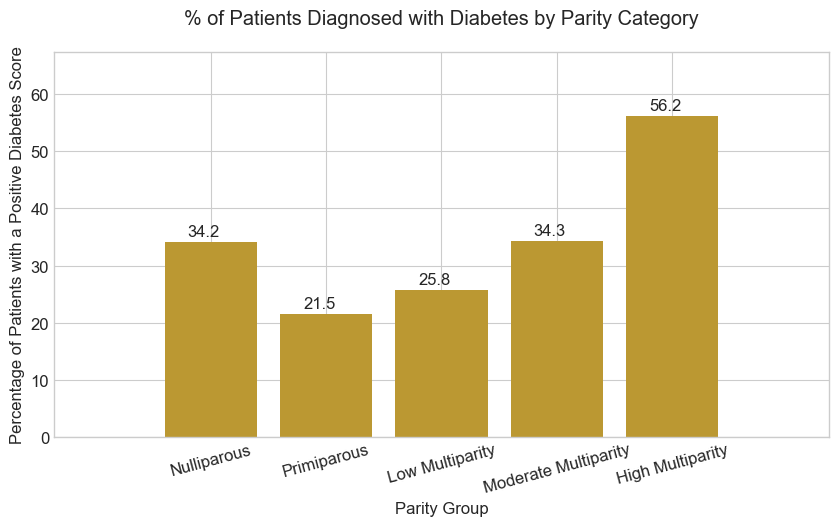

In [27]:
#### HUH
# :///// I dislike figuring out matplotlib I need to go watch a youtube video or something...

#Plot bar w/fig width height changed
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

#Make bar. I think?
bars = plt.bar(xVal, oneResult, width=.4)

#Access bar to place the text in the appropriate location. 
#yval + 1 is to move it up.
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 1, yval, fontsize = 12)

#Rotato potato + titles & namings. Also setting margins (space from start to end. just makes it look nicer)
plt.xticks(rotation=15)
plt.title('% of Patients Diagnosed with Diabetes by Parity Category', pad=20)
plt.xlabel('Parity Group')
plt.ylabel('Percentage of Patients with a Positive Diabetes Score')
plt.margins(0.2)

plt.bar(x, oneResult)
plt.show()

In [30]:
####### Once again, but with pedigreefunction!

#Bringing this back so I don't have to scroll for it.
print("Pedigree Validation")
print(f"Negative Pedigree: {(df['DiabetesPedigreeFunction'] < 0).sum()}")
print(f"Pedigree above 1: {(df['DiabetesPedigreeFunction'] > 1).sum()}")
print(f"Pedigree range: {df['DiabetesPedigreeFunction'].min()} to {df['DiabetesPedigreeFunction'].max()}")
print(f"Mean Pedigree: {df['DiabetesPedigreeFunction'].mean():.1f}")

Pedigree Validation
Negative Pedigree: 0
Pedigree above 1: 51
Pedigree range: 0.078 to 2.42
Mean Pedigree: 0.5


#### Leaving this here because I know I'll return to see the code at some point. 
With that said, I... I have no idea why I thought to make this. Of course pedigree scores have nothing to do with pregnancy rates...............

Rectangle(xy=(-0.3, 0), width=0.6, height=0.52, angle=0)
Rectangle(xy=(0.7, 0), width=0.6, height=0.49, angle=0)
Rectangle(xy=(1.7, 0), width=0.6, height=0.47, angle=0)
Rectangle(xy=(2.7, 0), width=0.6, height=0.43, angle=0)
Rectangle(xy=(3.7, 0), width=0.6, height=0.48, angle=0)


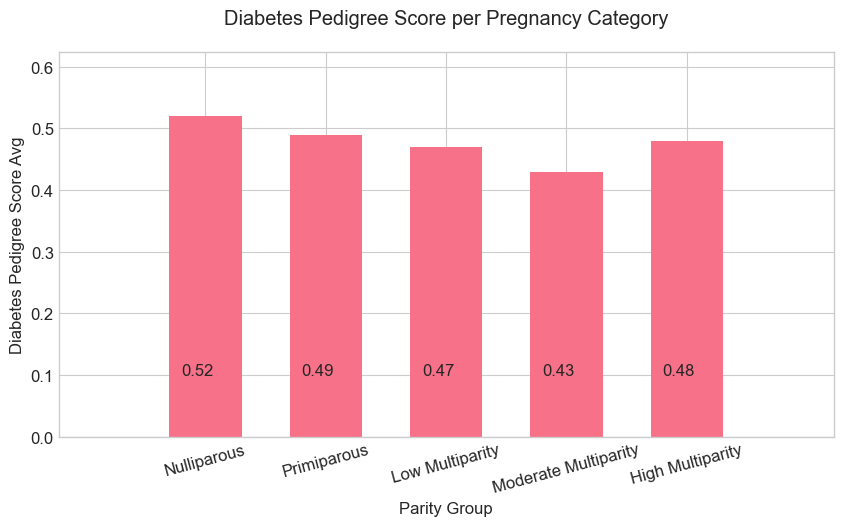

In [35]:
#Set up plot here
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

#Get averages here
groupDf=df.groupby(['pregnancy_category']).mean()
# print(groupDf)
#Sort into rounded values here cause IDK how to do it over there
cleaned = []
for i in groupDf['DiabetesPedigreeFunction']:
    cleaned.append(round(i,2))
# print(cleaned)


#Make bar
bars = plt.bar(labels, cleaned, width=.6)

for bar in bars:
    print(bar)

#Access bar to place the text in the appropriate location
for i in range(0,5):
    #I am brute forcing this but if it gets it done it gets it done...
    plt.text(-.2 + i*1, 0.1, cleaned[i], fontsize = 12)

#Rotato Potato + Naming + Titles
plt.xticks(rotation=15)
plt.title('Diabetes Pedigree Score per Pregnancy Category', pad=20)
plt.xlabel('Parity Group')
plt.ylabel('Diabetes Pedigree Score Avg')
plt.margins(0.2)

#Show
plt.show()

---

# Part 5: Research Questions
 **Point Worth Total:** 15 points


---

### 5.1 Write Three Answerable Questions (9 points)

Write three questions that THIS dataset can answer. Remember: the data can show relationships and patterns, but cannot prove causation.

**Your questions must explore these specific areas:**

1. **A question about pregnancy history and diabetes outcome:**

- Is high multiparity rate is correlated with a positive diabetes diagnosis?

3. **A question comparing patients by DiabetesPedigreeFunction levels:**

- Does the diabetespedigreefunction score change with age?

4. **A question about the combination of age AND number of pregnancies:**

- What average age group do the parity levels have?

---

### 5.2 Identify One Question the Data CANNOT Answer (3 points)

Write one question about **gestational diabetes history or pregnancy complications** that this dataset cannot answer, and explain why.

**Question:**  
**Why it cannot be answered with this data:**  

---

### 5.3 Grouping Analysis (3 points)

Answer this question using a groupby analysis:

**"What is the average number of pregnancies for patients with diabetes (Outcome=1) versus without diabetes (Outcome=0)?"**

**Your Code:**

**Your Interpretation:**

Do diabetic patients have more or fewer pregnancies on average? Is this difference statistically meaningful, or could it be confounded by other factors (like age)?

---

# Part 6: Target Variable Analysis (Opt.)
 **Point Worth Total:** 5 points


---

The `Outcome` column is our **target variable** - what we're trying to predict. Analyze its distribution.

**Your Code:**

In [ ]:
# Show the count and percentage of diabetic vs non-diabetic patients


### Bonus Questions:

**1. What percentage of patients in this dataset have diabetes?**

Your answer:

---

**2. Is this dataset balanced or imbalanced? (A balanced dataset has roughly equal classes)**

Your answer:

---

**3. Why does class imbalance matter for machine learning? (You may need to research this)**

Your answer:

---

**4. The Pima Indians have one of the highest rates of diabetes in the world (around 50% in some studies). How does this dataset's diabetes rate compare? What might this tell you about the patient selection criteria?**

Your answer:

---


# Submission Checklist

Before submitting, verify you have completed:

- [ ] **Part 1:** All 10 inspection steps with code AND written findings
- [ ] **Part 2:** Complete data dictionary with all 9 columns filled in
- [ ] **Part 2:** Answered all 4 clinical research questions
- [ ] **Part 3:** All 3 validation checks with code and answers
- [ ] **Part 4:** Created `pregnancy_category` column using the **Obstetric History Categories**
- [ ] **Part 4:** Calculated diabetes rate by pregnancy category with interpretation
- [ ] **Part 5:** Three research questions (pregnancy, pedigree function, age+pregnancy)
- [ ] **Part 5:** One unanswerable question about gestational diabetes/pregnancy complications
- [ ] **Part 5:** Pregnancies by outcome groupby analysis
- [ ] **Bonus (Optional):** Target variable analysis


# Grading Rubric

| Component | Points | Requirements for Full Credit |
|-----------|--------|------------------------------|
| Part 1: 10-Point Inspection | 40 | All 10 steps complete with working code AND thoughtful written analysis |
| Part 2: Data Dictionary | 20 | All 9 columns documented with correct feature types and clinical research |
| Part 3: Data Validation | 15 | All validation checks complete with working code and insightful answers |
| Part 4: Pregnancy Categories | 10 | Working code that creates correct groups AND meaningful interpretation of pregnancy-diabetes relationship |
| Part 5: Research Questions | 15 | Three good questions in specified areas, one clear limitation, groupby analysis complete |
| **Bonus:** Target Analysis | +5 | Thoughtful analysis of class imbalance with real-world connection |
| **Total** | 100 (+5 bonus) | |

---

# Hints (Read Before You Get Stuck!)

### ⚠️ Common Pitfalls:

1. **Zeros as Missing Values (but NOT for Pregnancies!)**
   - This dataset uses **0** to represent missing values for `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI`
   - However, **0 pregnancies is a valid value** - it means the patient has never been pregnant
   - Don't accidentally filter out nulliparous patients!

2. **Pregnancies and Age are confounded** - older patients have had more time to have more pregnancies, so any relationship you see might be partially explained by age

3. **All patients are female and at least 21 years old** - this limits what generalizations you can make

4. **Grand multiparity (7+ pregnancies)** - while less common in modern populations, this was more typical historically and in certain communities

### 💡 Pro Tips:

- Use `value_counts()` liberally to understand distributions
- The Pregnancies column has a right-skewed distribution - most patients have few pregnancies, but some have many
- When interpreting pregnancy-diabetes relationships, always consider age as a confounding variable
- Use `pd.cut()` with `include_lowest=True` and appropriate bins
- The `describe()` function is your friend - look at the quartiles for Pregnancies

---

## Useful Resources

- **Original Dataset Source:** UCI Machine Learning Repository
- **Gestational Diabetes:** https://www.diabetes.org/diabetes/gestational-diabetes
- **Grand Multiparity Risks:** https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3279173/
- **Pima Indian Diabetes Research:** https://www.niddk.nih.gov/about-niddk/research-areas/diabetes/diabetes-prevention-program-dpp
- **Pandas Documentation:** https://pandas.pydata.org/docs/